<a href="https://colab.research.google.com/github/raunakkaul/personalprojects/blob/main/Comparing_data_sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Python project utilizes various libraries such as NumPy, MATLAB, Seaborn, and others to process two datasets. The primary objectives include data cleaning, comparison of columns, and drawing reasonable conclusions through hypothesis testing.

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
from matplotlib import rcParams
import matplotlib.font_manager

Reading in the data


In [ ]:
mdata = pd.read_csv("Data1.csv")


In [ ]:
fdata = pd.read_csv("Data2.csv")



Merging the data sets, I excluded the priming column for this


In [ ]:
data = pd.concat([mdata, fdata], ignore_index=True)

Deleted rows which had more than 3 missing values

In [ ]:
missing_values = data.isna().sum(axis=1)

data = data.drop(data[missing_values > 3].index)

Dropping dulpicates and performing mode imputation

In [ ]:
data.drop_duplicates()

In [ ]:
data = data.fillna(data.mode().iloc[0])

Correcting the incorrectly spelled terms

In [ ]:
data['What bests represents your gender?'] = data['What bests represents your gender?'].replace('Famale', 'Female')

## First question - How does one's gender influence their stance on financial support in the context of separate finances within a family?


Creating a contingency table

In [ ]:
column_name =  data.iloc[:, 8]

copy = data.copy()

copy = copy.rename(columns={'My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I\'m planning on sending him to a private school. My wife\'s son currently goes to a much less nice public school. My wife says I\'m a jerk for not paying for her daughter to go to private school as well.':'Expenses question'})



Index(['Timestamp', 'What year are you?', 'How old are you?',
       'You could describe the adults you grew up with as...',
       'You could describe yourself as...',
       'How would you rate your religiousness / spirituality?',
       'What bests represents your gender?',
       'My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?',
       'My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. He

Null hypothesis: Gender and opinion on who is right are independent

Alternate hypothesis: Gender and opinion on who is right are strongly related


In [ ]:
table = pd.crosstab(copy['What bests represents your gender?'], copy['Expenses question'])

Performing a chi square test

In [ ]:
chi2, p, dof, expected = chi2_contingency(table)

p

0.6284766927433232

## Second Question -  Does Turning 21 make people more religious/spiritual?

First I will isolate those of the age I need


In [ ]:
copy = data[(data['How old are you?'] == "20") | (data['How old are you?'] == "21") | (data['How old are you?'] == "19")| (data['How old are you?'] == "22") ]


In [ ]:
contingency_table = pd.crosstab(copy['How old are you?'], copy['How would you rate your religiousness / spirituality?'])
percentage_table = contingency_table.div(contingency_table.sum(1), axis=0) * 100


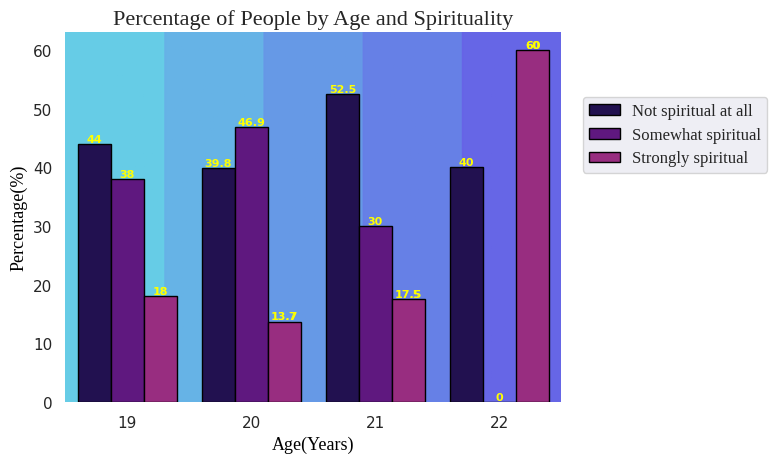

In [ ]:
d = {
    'year': [19,20,21, 22, 19,20,21,22,19,20,21, 22],
    'group': ['Not spiritual at all', 'Not spiritual at all', 'Not spiritual at all',  'Not spiritual at all', 'Somewhat spiritual', 'Somewhat spiritual', 'Somewhat spiritual', 'Somewhat spiritual',
              'Strongly spiritual', 'Strongly spiritual', 'Strongly spiritual','Strongly spiritual'],
    'percentage': [44, 39.8, 52.5, 40, 38, 46.9, 30, 0, 18, 13.7, 17.5, 60]
}
df = pd.DataFrame(d)

sns.set_style("white")

custom_palette = sns.color_palette(palette='magma')
sns.set_palette(custom_palette)

ax = sns.barplot(data=df, x="year", y= "percentage", hue="group", edgecolor = "black", alpha=1, saturation=1)

for container in ax.containers:
    ax.bar_label(container, label_type="edge", fontsize=8, color="yellow", fontweight="bold")

ax.bar_label(container, label_type="edge", fontsize=8, color="yellow")
sns.set(rc={'font.family': 'Liberation Serif', 'font.size': 9.5})

plt.xlabel('Age(Years)', color='Black', fontsize = '13', fontfamily = 'Liberation Serif')
plt.ylabel('Percentage(%)', color = 'Black', fontsize = '13', fontfamily = 'Liberation Serif')
plt.title('Percentage of People by Age and Spirituality', fontsize = '16', fontfamily = 'Liberation Serif')

legend = plt.legend(title='Legend Title', loc='lower right', bbox_to_anchor=(1.43, 0.6))

legend.set_title('')

legend.get_texts()[0].set_fontsize(12)
legend.get_texts()[1].set_fontsize(12)
legend.get_texts()[2].set_fontsize(12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

img = plt.imread("download.png")
ax.imshow(img, extent=[ax.get_xlim()[0], ax.get_xlim()[1], ax.get_ylim()[0], ax.get_ylim()[1]], aspect='auto')

plt.show()

## Third Question - How was your own political view shaped by the political view of the adults you grew up with?

Contingency table

In [ ]:
cont = pd.crosstab(data['You could describe yourself as...'], data['You could describe the adults you grew up with as...'])
cont




You could describe the adults you grew up with as...,Don't know / It's complicated,Mildly conservative,Mildly liberal,Neutral,Strongly conservative,Strongly liberal
You could describe yourself as...,,,,,,
Don't know / It's complicated,6,4,1,1,0,1
Mildly conservative,0,14,4,4,4,0
Mildly liberal,3,22,35,18,6,5
Neutral,5,17,6,14,2,0
Strongly conservative,0,1,2,1,4,1
Strongly liberal,3,10,18,3,5,8


Null Hypothesis - Political view of adults you grew up with and your own political view are indepentent

Alternate - Political view of adults you grew up with and your own political view are strongly related

In [ ]:
chi2, p, dof, expected = chi2_contingency(cont)
p

1.6393130083128348e-09

Null hypothesis is accepted.